In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from numpy import mean

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
first_row = session.query(Measurement).first()
first_row.__dict__

#Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()



('2017-08-23',)

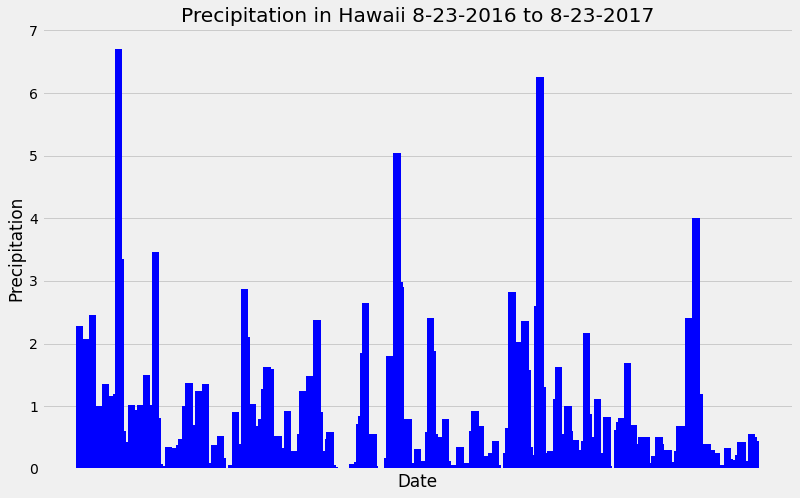

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date = dt.datetime(2017,8,23)
# Calculate the date one year from the last date in data set.
New_Date = date - dt.timedelta(days=365)
New_Date

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23)').\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
results_df = pd.DataFrame(results)
results_df.rename(columns={0:'date',1:'prcp'}, inplace=True)
results_df = results_df.reindex(['date','prcp'], axis='columns', fill_value = 0)
results_df

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
dates = results_df['date']
precipitation = results_df['prcp']


fig, ax = plt.subplots(figsize=(12, 9))
ax.bar(dates,
       precipitation,
       color = "blue",
       width=4)
ax.set(xlabel="Date",
       ylabel="Precipitation",
       title="Precipitation in Hawaii 8-23-2016 to 8-23-2017")
       #xlim=['2016-08-23','2017-08-23'])
# ax.xaxis.set_major_locator(mdates.MonthLocator())
# date_form = mdates.DateFormatter("%m-%d")
# ax.xaxis.set_major_formatter(date_form)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest years.

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

plt.show()



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
first_row = session.query(Measurement).first()
first_row.__dict__

station_count = session.query(Measurement.station).\
    group_by(Measurement.station).count()
station_count

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
count_ = func.count(Measurement.station)

active_stations = session.query(Measurement.station, count_).\
    group_by(Measurement.station).\
    order_by(count_.desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = 'USC00519281'
low_temp = session.query(func.min(Measurement.tobs)).\
    filter_by(station = most_active_station).all()
low_temp

temps = session.query(Measurement.tobs).\
    filter_by(station=most_active_station).all()
mean(temps)

max_temp = session.query(func.max(Measurement.tobs)).\
    filter_by(station=most_active_station).all()
max_temp





[(85.0,)]

Text(0.5, 1.0, 'temperature readings at most popular station for most recent year')

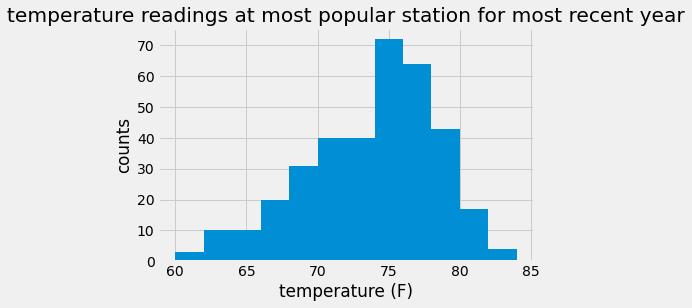

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.date).\
    filter_by(station=most_active_station).\
    order_by(Measurement.date.desc()).first()

date = dt.datetime(2017,8,18)
# Calculate the date one year from the last date in data set.
New_Date = date - dt.timedelta(days=365)
New_Date

# Perform a query to retrieve the date and temperature scores
results = session.query(Measurement.tobs).\
    filter_by(station=most_active_station).\
    filter(Measurement.date > '2016-08-17').\
    order_by(Measurement.date).all()

results_df = pd.DataFrame(results)    
results_df.hist(bins=np.arange(60,85,2))
plt.ylabel("counts")
plt.xlabel("temperature (F)")
plt.title("temperature readings at most popular station for most recent year")


# Close session

In [18]:
session.query(Station.name).all()

[('WAIKIKI 717.2, HI US',),
 ('KANEOHE 838.1, HI US',),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US',),
 ('PEARL CITY, HI US',),
 ('UPPER WAHIAWA 874.3, HI US',),
 ('WAIMANALO EXPERIMENTAL FARM, HI US',),
 ('WAIHEE 837.5, HI US',),
 ('HONOLULU OBSERVATORY 702.2, HI US',),
 ('MANOA LYON ARBO 785.2, HI US',)]

In [16]:
# Close Session
session.close()